In [ ]:
import osmnx as ox
import geopandas as gpd
import networkx as nx

In [ ]:
# Get paris city graph
G = ox.graph_from_place('Paris, France', network_type='drive')

In [ ]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [ ]:
point = [{
            "lon": 2.348707914352417,
            "lat": 48.85187911987305
        },{
            "lon": 2.3451132774353027,
            "lat": 48.85109329223633
        }]


# Get the nearest nodes from the point
orig_node = ox.nearest_nodes(G, point[0]['lon'], point[0]['lat'])
dest_node = ox.nearest_nodes(G, point[1]['lon'], point[1]['lat'])
print(orig_node, dest_node)
# Get route
route = ox.shortest_path(G, orig_node, dest_node, weight='travel_time')
route_nx = nx.shortest_path(G, orig_node, dest_node, weight='travel_time')
print(route)
print(route_nx)

In [ ]:

bbox = ox.utils_geo.bbox_from_point((point[0]['lat'],point[0]['lon'] ), dist=1000)
fig, ax = ox.plot_graph_route(G, route, 'r', bbox=bbox)

In [ ]:
# constrain plot to a bounding box
north, south, east, west = 48.85, 48.84, 2.35, 2.34

# to geopandas 
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)


In [ ]:
# plot map in geopandas
# gdf_nodes.explore()
# plot route in geopandas
gdf_edges.loc[route].explore()

In [ ]:
# Get the nearest node to the Eiffel Tower
eiffel_tower = (48.858093, 2.294694)
eiffel_tower_node = ox.nearest_nodes(G, eiffel_tower[1], eiffel_tower[0])
print(eiffel_tower_node)

In [ ]:
Krakow = ox.graph_from_place('Krakow, Poland', network_type='all')
print("Number of nodes: ", Krakow.number_of_nodes())
for node in Krakow.nodes(data=True):
    print(node)

In [ ]:
ox.plot_graph(Krakow)

In [ ]:
G.nodes[eiffel_tower_node]

In [ ]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)


In [ ]:
nodes = ['node/4074851973', 'node/409552086']

# Check if nodes are in the graph
nodes2 = [node for node in nodes if node in G.nodes]
print(nodes2)
print(len(G.nodes))

# Get the nearest nodes to a point

find = ox.distance.nearest_nodes(G, 2.3522, 48.8566, return_dist=True)

In [ ]:

# make route between two nodes
route = ox.shortest_path(G, nodes[0], nodes[1])

In [2]:
from Trips.trip import HumanTraveller

documenns = ['Data/UserPreferences/1_Marek_Kowalski_doc1.txt', 'Data/UserPreferences/1_Marek_Kowalski_doc2.txt',
             'Data/UserPreferences/1_Marek_Kowalski_doc3.txt']


traveller = HumanTraveller(name="John",
                          email='',
                           city="Krakow",
                           documents_path=documenns,
                           api_key='',
                           trip_type='walk') # walk, drive, all # drive - loads fastest

c:\Users\Jakub\anaconda3\envs\obrazy\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Jakub\anaconda3\envs\obrazy\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'acros', 'afterward', 'alway', 'ha', 'hi', 'le', 'nevertheles', 'perhap', 'seriou', 'thi', 'thu', 'u', 'wa', 'wherea'] not in stop_words.
  warnings.warn(


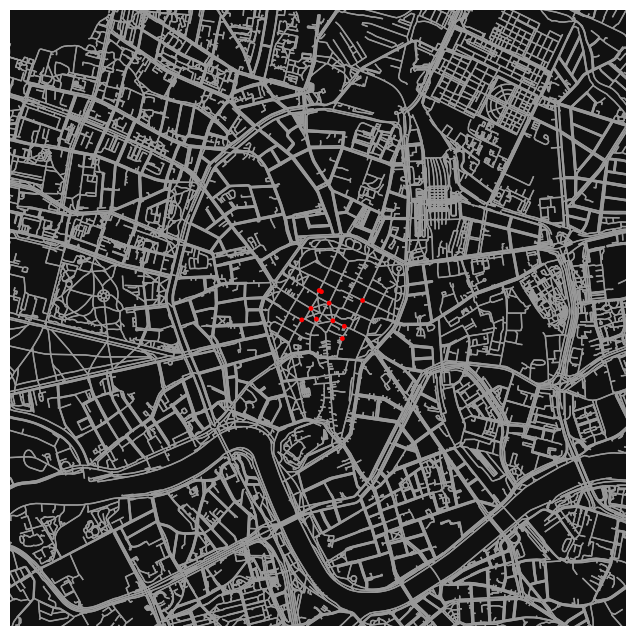

In [3]:
traveller.simple_graph()

In [4]:
traveller.simple_map().explore()

c:\Users\Jakub\Desktop\VirtualTravelAssistant\Trips\graphing.py:16: FutureWarning: The `great_circle_vec` function has been renamed `great_circle`. Calling `great_circle_vec` will raise an error starting in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  weight=ox.distance.great_circle_vec(


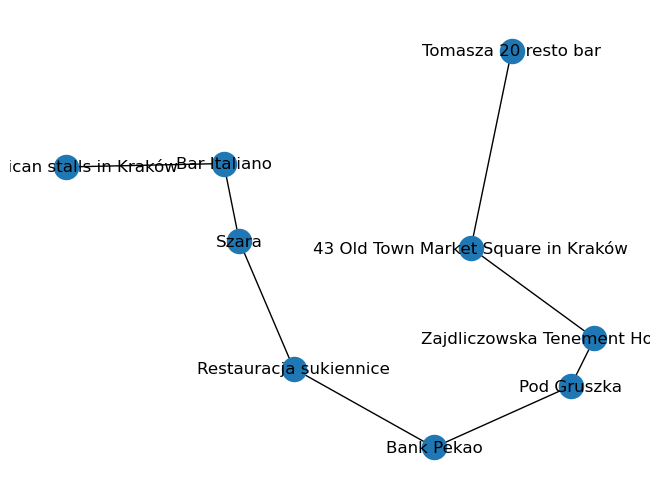

c:\Users\Jakub\Desktop\VirtualTravelAssistant\Trips\graphing.py:35: FutureWarning: The `great_circle_vec` function has been renamed `great_circle`. Calling `great_circle_vec` will raise an error starting in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G[u][v]["length"] = ox.distance.great_circle_vec(y1, x1, y2, x2)


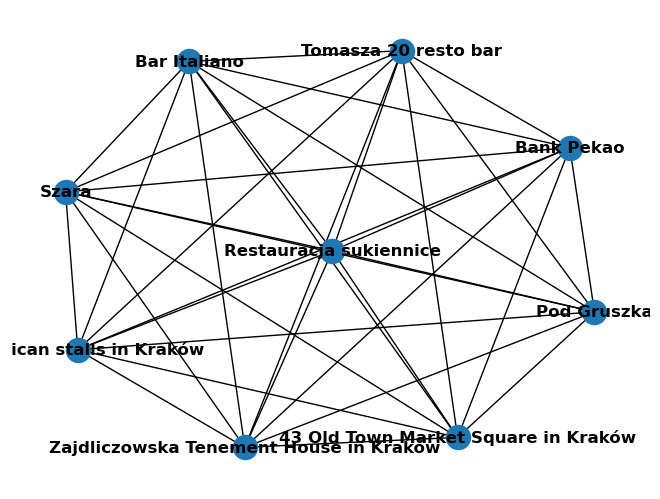

swapping edges ('Restauracja sukiennice', 'Bank Pekao') ('Dominican stalls in Kraków', 'Pod Gruszka') with ('Restauracja sukiennice', 'Dominican stalls in Kraków') ('Bank Pekao', 'Pod Gruszka')
swapping edges ('Restauracja sukiennice', 'Dominican stalls in Kraków') ('Zajdliczowska Tenement House in Kraków', 'Tomasza 20 resto bar') with ('Restauracja sukiennice', 'Zajdliczowska Tenement House in Kraków') ('Dominican stalls in Kraków', 'Tomasza 20 resto bar')
swapping edges ('Bank Pekao', 'Szara') ('43 Old Town Market Square in Kraków', 'Bar Italiano') with ('Bank Pekao', '43 Old Town Market Square in Kraków') ('Szara', 'Bar Italiano')
swapping edges ('43 Old Town Market Square in Kraków', 'Szara') ('Tomasza 20 resto bar', 'Restauracja sukiennice') with ('43 Old Town Market Square in Kraków', 'Tomasza 20 resto bar') ('Szara', 'Restauracja sukiennice')
swapping edges ('Tomasza 20 resto bar', 'Dominican stalls in Kraków') ('Bar Italiano', 'Szara') with ('Tomasza 20 resto bar', 'Bar Italian

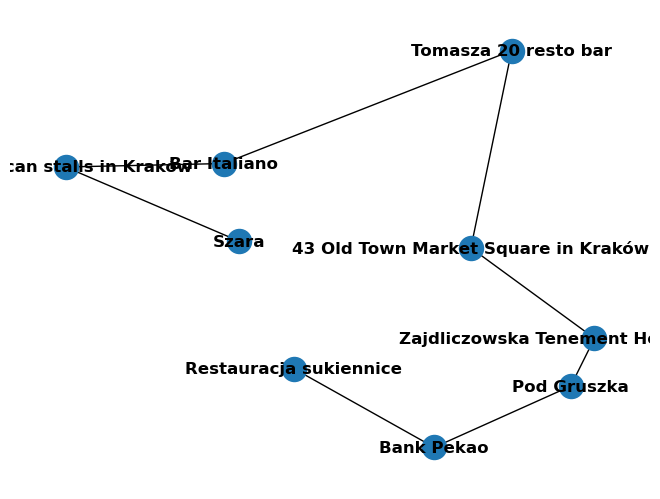

9
8
8


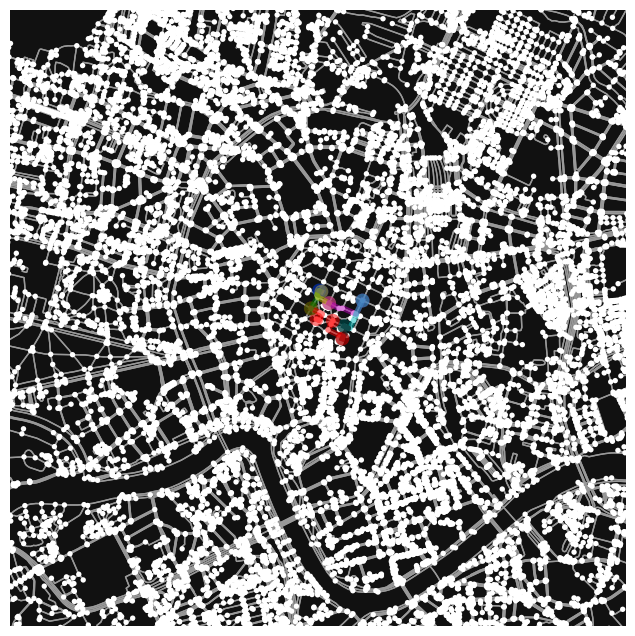

In [5]:
traveller.trip_planner()

In [6]:
traveller.trip_map().explore()

In [ ]:
from Trips.graphing import *

pois = traveller.graph_pois
nodes = traveller.nodes
Graph = traveller.Graph


In [ ]:
# Create minimum spanning tree 
T, pos =stage_one(pois)
print(nodes)
print(T)
print(pos)



In [ ]:
Eulerian = nx.eulerize(T)
e_path = nx.eulerian_path(Eulerian)
import matplotlib.pyplot as plt


    
s_path = nx.shortest_path(Eulerian)
print(list(s_path))

s_path = list(s_path)

for u, v in zip(s_path[:-1], s_path[1:]):
    print(u)
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    plt.plot([x1, x2], [y1, y2], 'ro-')
    plt.text(x1, y1, u)



In [ ]:
e_path, _ = stage_two(T, pos)
print(e_path.nodes)

In [ ]:
shortest_path = nx.shortest_path(e_path, weight='length')

In [ ]:
path_len = path_length(shortest_path, pos)
print(path_len)

swap = two_opt_swap(shortest_path, 1, 2)
print(shortest_path)
print(swap)

In [ ]:

opt = stage_four(shortest_path, pos)

In [ ]:

pos = list(pos.values())
routes = []

for org, dest in zip(pos[:-1], pos[1:]):
    org = ox.distance.nearest_nodes(Graph, org[1], org[0])
    dest = ox.distance.nearest_nodes(Graph, dest[1], dest[0])
    route = ox.shortest_path(Graph, org, dest)
    routes.append(route)
print(len(routes))

routes_colors = [ 'r', 'g', 'b', 'y', 'm', 'c', 'k', 'w']

print(len(routes_colors))

In [ ]:
bbox = ox.utils_geo.bbox_from_point(pos[0], dist=1000)
fig, ax = ox.plot_graph_routes(Graph, routes, bbox=bbox, route_colors=routes_colors)

In [ ]:
T, pos =stage_one(pois)
print(nodes)
print(T)
print(pos)

In [ ]:
G = nx.complete_graph(T.nodes)

In [ ]:

import math

# Add weight to the edges
for u, v in G.edges:
    x1, y1 = pos[u]
    x2, y2 = pos[v]
    G[u][v]['length'] = ox.distance.great_circle_vec(y1, x1, y2, x2)

nx.draw(G, with_labels=True, font_weight='bold')



In [ ]:
tour = list(G.nodes)
n = len(tour)
improved = True
while improved:
    improved = False
    for i in range(n-1):
        for j in range(i+1,n):
            
            # two current edges from tour
            cur1 = (tour[i],tour[i+1])
            cur2 = (tour[j],tour[(j+1)%n])
            cur_length = G.edges[cur1]['length'] + G.edges[cur2]['length']
            
            # two 'new' edges for the tour
            new1 = (tour[i],tour[j])
            new2 = (tour[i+1],tour[(j+1)%n])
            new_length = G.edges[new1]['length'] + G.edges[new2]['length']
            
            # update the tour, if improved
            if new_length < cur_length:
                print("swapping edges",cur1,cur2,"with",new1,new2)
                tour[i+1:j+1] = tour[i+1:j+1][::-1]
                improved = True
                
                # draw the new tour
                tour_edges = [ (tour[i-1],tour[i]) for i in range(n) ]
                plt.figure() # call this to create a new figure, instead of drawing over the previous one(s)
                nx.draw(G.edge_subgraph(tour_edges), pos=pos, with_labels=True, font_weight='bold')
                

In [ ]:
print(tour)
tour_edges = [(tour[i], tour[i+1]) for i in range(len(tour)-1)]
nx.draw(nx.edge_subgraph(G,tour_edges), pos=pos, with_labels=True, font_weight='bold')